In [ ]:
NAME: Akash Mishra
ROLL NO : 36
CLASS : BE IT (B2)
TITLE : :Use Autoencoder to implement anomaly detection. Build the model by using:
            a. Import required libraries
            b. Upload / access the dataset
            c. Encoder converts it into latent representation
            d. Decoder networks convert it back to the original input
            e. Compile the models with Optimizer, Loss, and Evaluation Metrics

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

In [3]:
dataset =pd.read_csv("creditcard.csv")

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(dataset.drop("Class", axis=1))
y = dataset["Class"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
input_dim = X_train.shape[1]


In [11]:
encoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu')
])

In [13]:
decoder = models.Sequential([
    layers.Input(shape=(16,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(input_dim, activation='linear')  # Using 'linear' activation for reconstruction
])

autoencoder = models.Sequential([
    encoder,
    decoder
])

In [15]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 44s 6ms/step - loss: 0.3369 - val_loss: 0.1915
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 45s 6ms/step - loss: 0.1628 - val_loss: 0.1433
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 45s 6ms/step - loss: 0.1373 - val_loss: 0.1298
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 82s 6ms/step - loss: 0.1181 - val_loss: 0.1047
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 83s 6ms/step - loss: 0.1001 - val_loss: 0.0926
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 80s 6ms/step - loss: 0.0929 - val_loss: 0.2494
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - loss: 0.0903 - val_loss: 0.0851
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 44s 6ms/step - loss: 0.0883 - val_loss: 0.0917
Epoch 9/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 79s 6ms/step - loss: 0.0861 - val_loss: 0.0791
Epoch 10/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - loss: 0.0819 - val_loss: 0.0756


In [17]:
y_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - y_pred, 2), axis=1)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


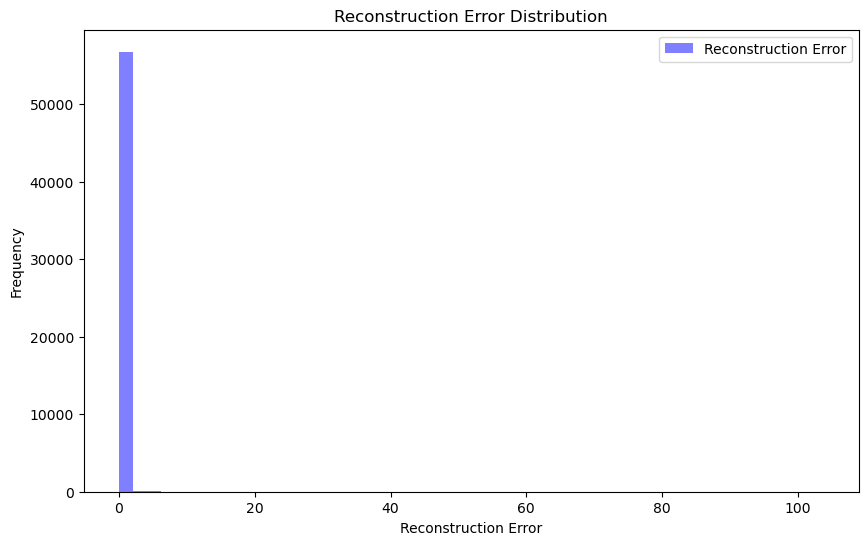

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(mse, bins=50, alpha=0.5, color='b', label='Reconstruction Error')
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.title("Reconstruction Error Distribution")
plt.show()

In [21]:
thresholds = np.arange(0.1, 1.0, 0.1)  # Adjust the step size as needed

for threshold in thresholds:
    anomalies = mse > threshold

In [23]:
num_anomalies = np.sum(anomalies)
print(f"Threshold: {threshold:.1f}, Number of anomalies: {num_anomalies}")

Threshold: 0.9, Number of anomalies: 527


In [25]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, anomalies))

print("\nClassification Report:")
print(classification_report(y_test, anomalies))


Confusion Matrix:
[[56392   472]
 [   43    55]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.10      0.56      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.78      0.59     56962
weighted avg       1.00      0.99      0.99     56962



In [27]:
import seaborn as sns

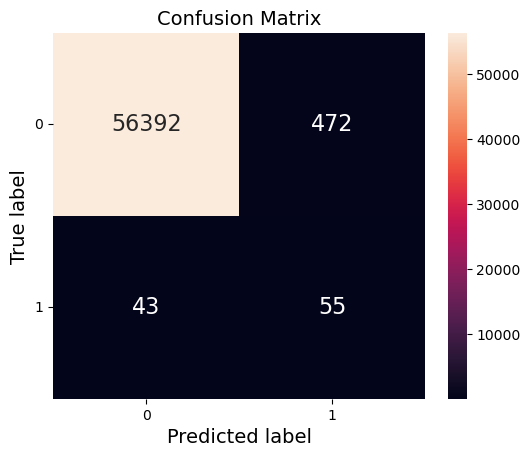

In [29]:
plt.figure(figsize = (6, 4.75))
sns.heatmap(confusion_matrix(y_test, anomalies), annot = True, annot_kws = {"size": 16}, fmt = 'd')
plt.xticks([0.5, 1.5],  rotation = 'horizontal')
plt.yticks([0.5, 1.5],  rotation = 'horizontal')
plt.xlabel("Predicted label", fontsize = 14)
plt.ylabel("True label", fontsize = 14)
plt.title("Confusion Matrix", fontsize = 14)
plt.grid(False)
plt.show()